#### Problem statement (Term Deposit Sale)
**Goal**
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit  and thus increase their hit ratio. 

**Resources Available**
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

##### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1.  Univariate analysis (12 marks)
> a.  Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of 
distributions / tails, missing values, outliers. <br>
b.  Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.<br>
c.  Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
2.  Multivariate analysis (8 marks)
> a.  Bi-variate analysis between the predictor variables and target column. Comment 
on your findings in terms of their relationship and degree of relation if any. <br>
Visualize the analysis using boxplots and pair plots, histograms or density curves. 
Select the most appropriate attributes.<br>
b.  Please provide comments in jupyter notebook regarding the steps you take and 
insights drawn from the plots  <br>
##### Deliverable – 2 (Prepare the data for analytics) – (10)
1.  Ensure the attribute types are correct. If not, take appropriate actions.
2.  Get the data model ready. 
3.  Transform the data i.e. scale / normalize if required
4.  Create the training set and test set in ratio of 70:30
##### Deliverable – 3 (create the ensemble model) – (30)
1.  First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2.  Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks) 
3.  Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

##### Attribute information
**Input variables:**

*Bank client data:*
1.  age: Continuous feature 
2.  job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.  marital: marital status (married, single, divorced)
4.  education: education level (primary, secondary, tertiary)
5.  default: has credit in default? 
6.  housing: has housing loan? 
7.  loan: has personal loan?
8.  balance in account Related to previous contact:
9.  contact: contact communication type
10.  month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

*Other attributes:*<br>
13.  campaign: number of contacts performed during this campaign and for this client<br>
14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)<br>
15.  previous: number of times the client has been contacted before for the last campaign to subscribe term deposit<br>
16. poutcome: outcome of the previous marketing campaign<br>

**Output variable (desired target):**<br>
17.  Target: Tell us has the client subscribed a term deposit. (Yes, No) 

### Presentation of Proposed Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read and interrogate Data 

In [2]:
bank_data = pd.read_csv('bank-full.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Data consists of 45211 records and no missing values from a quick check have been found

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Categorical Variables
catl = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
#Continuous Variables
conts = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
bank_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank_data[bank_data['balance']<0].shape[0]

3766

#### Univariate Analysis

#### Continuous Variables

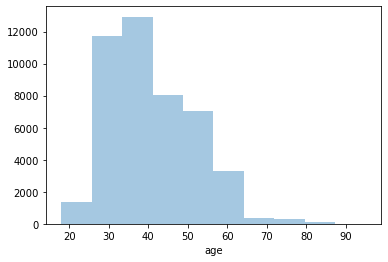

In [10]:
sns.distplot(bank_data['age'], kde=False, bins=10);

modal age class is between 30 - 40 years in our dataset

In [11]:
d, q, s, k = [], [], [], []
for i in conts:
    d.append(bank_data[i].max() - bank_data[i].min())
    q.append((bank_data[i].quantile(0.75) - bank_data[i].quantile(0.25))*1.5)
    s.append(bank_data[i].skew().round(2))
    k.append(bank_data[i].kurt().round(2))
pd.DataFrame([d, q, s, k] , columns=conts, index=['range', 'IQR*1.5', 'skewness', 'kurtosis'])

,age,balance,day,duration,campaign,pdays,previous
range,77.00,110146.00,30.00,4918.00,62.00,872.00,275.00
IQR*1.5,22.50,2034.00,19.50,324.00,3.00,0.00,0.00
skewness,0.68,8.36,0.09,3.14,4.90,2.62,41.85
kurtosis,0.32,140.75,-1.06,18.15,39.25,6.94,4506.86


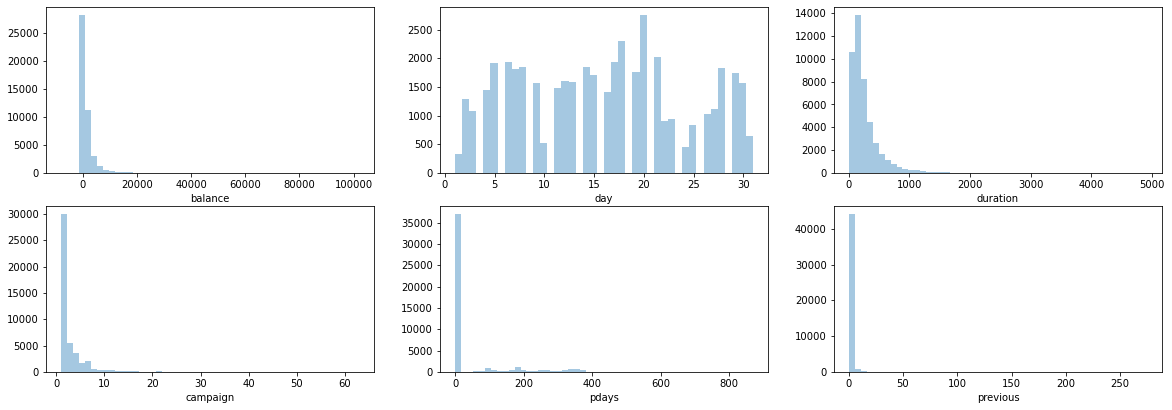

In [12]:
plt.figure(figsize= (20,25))
for i in conts[1:]:
    plt.subplot(7,3,conts[1:].index(i)+1)
    sns.distplot(bank_data[i], kde=False);

**Observation**<br>
With the exception of the 'day' variable, the rest of the continuous features show some positive skewness and from the visuals above it is clear that the are outliers which will need some sort of treatment mechanism (maybe different for each feature) to remove outlier effect

There is a clear evidence on skewness in our data, meaning these continous variables are not symmetric about the mean.

### Pdays drill down

In [13]:
(bank_data[bank_data['pdays']==-1]['pdays'].shape[0]/bank_data.shape[0])*100

81.73674548229414

In [14]:
print("minimum number of days: ", bank_data[bank_data['pdays']!=-1]['pdays'].min())
print("maximum number of days: ", bank_data[bank_data['pdays']!=-1]['pdays'].max())

minimum number of days:  1
maximum number of days:  871


**Discussion:**
pdays: number of days that passed by after the client was last contacted from a previous campaign <br>
**The value *-1* tells us that:**
- the person has not been contacted <br>
or
- contact period is beyond 900 days <br>

From the dataset it is clear that 81.7% of the clients were either not contacted or contact period was beyond 900 days. Therefore, inorder to use this variable, we need to find a way of representing these two scenarios in the dataset most probably py splitting the variable into two.

The rest of the values span 1 to 871 days. 

#### Categorical Variables 
- are either Ordinal (follow a particular order), or nominal (named data). I will sepaate the two and explore then differently

In [15]:
bank_data['contact'].nunique()

3

In [16]:
ordl = ['education', 'default', 'housing', 'loan', 'month']
noml = ['job', 'marital',  'contact', 'poutcome']

In [17]:
list(bank_data['job'].unique())

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

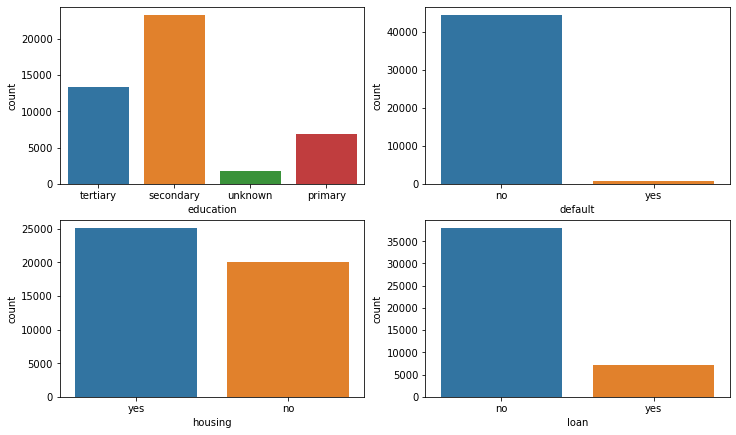

In [18]:
plt.figure(figsize= (12,15))
for i in ordl[:-1]:
    plt.subplot(4,2,ordl[:-1].index(i)+1)
    sns.countplot(x=i, data=bank_data);

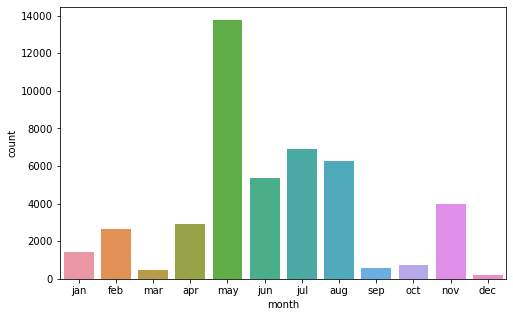

In [19]:
plt.figure(figsize= (8,5))
seq = ['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(x='month', data=bank_data, order=seq);

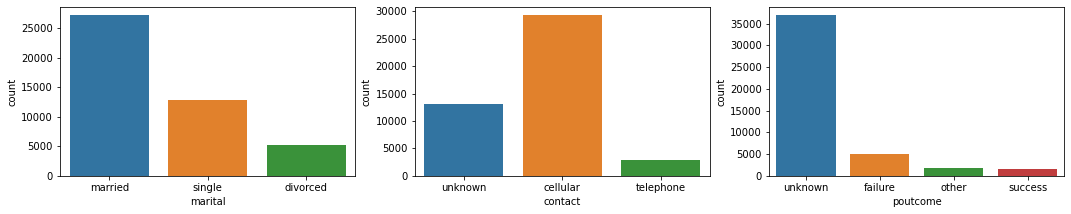

In [20]:
plt.figure(figsize= (18,18))
for i in noml[1:]:
    plt.subplot(5,3,noml[1:].index(i)+1)
    sns.countplot(x=i, data=bank_data);

In [21]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

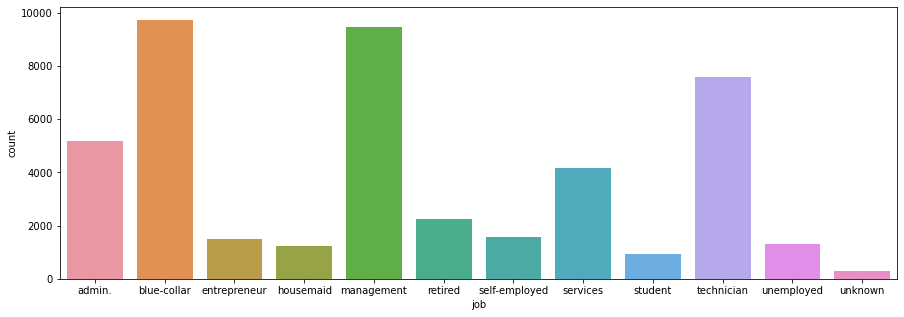

In [22]:
plt.figure(figsize= (15,5))
sns.countplot(x='job', data=bank_data, order=sorted(list(bank_data['job'].unique()), key=str.lower));

### Target

In [23]:
bank_data['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

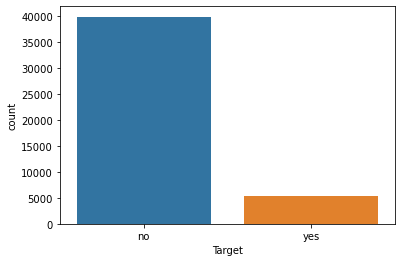

In [24]:
sns.countplot(x='Target', data=bank_data);

The proportion of no-subscription **:** subscription is 88 **:** 12, which presents a very imbalanced dataset.

In [25]:
bank_data.groupby('Target')[conts].mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


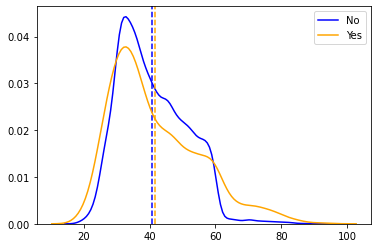

In [26]:
sns.distplot(bank_data['age'].loc[bank_data["Target"] == "no"].values, color='b', label='No', hist=False)
plt.axvline(bank_data['age'].loc[bank_data["Target"] == "no"].mean(), color='blue', ls='--')
sns.distplot(bank_data['age'].loc[bank_data["Target"] == "yes"].values, color='orange', label='Yes', hist=False)
plt.axvline(bank_data['age'].loc[bank_data["Target"] == "yes"].mean(), color='orange', ls='--');

**Observations**<br>
Consider the table and graph above:<br>
- the mean-balance for those who bought the term deposit is much higher than for those who didn't buy.
- on Average, the age of those who bought the term deposit is higher than that of the bank clients who didn’t, however this difference may not be statistically significant.

- mean duration as well is significantly higher for those who purchased the term-deposit which is expected as it (the length of the call) spells out interest in the client for what is being sold to them.
- However, mean campaign i.e. " *number of contacts performed during this campaign and for this client* " is lower for clients who bought the term deposit.

### Bivariate Analysis

**Job** vs **Target**

in order to investigate the relationship between these two variables, given the number of categories in the variable *job* i decided to do table showing how many clients are in each job category and how many bougght the term deposit how many didnt per category.<br>
reference: https://stackoverflow.com/questions/52153364/how-to-create-table-from-python-output

In [27]:
from prettytable import PrettyTable

table = PrettyTable(field_names=['Job', 'Count', '%ge Non-Subscribers', '%ge Subscribers'])
for i in sorted(list(bank_data['job'].unique()), key=str.lower):
    table.add_row([i, len(bank_data[bank_data['job'] == i]), 
                   round(bank_data[bank_data['job'] == i]['Target'].value_counts()[0]/len(bank_data[bank_data['job'] == i])*100,2),
                   round(bank_data[bank_data['job'] == i]['Target'].value_counts()[1]/len(bank_data[bank_data['job'] == i])*100,2)])
print(table)

+---------------+-------+---------------------+-----------------+
|      Job      | Count | %ge Non-Subscribers | %ge Subscribers |
+---------------+-------+---------------------+-----------------+
|     admin.    |  5171 |         87.8        |       12.2      |
|  blue-collar  |  9732 |        92.73        |       7.27      |
|  entrepreneur |  1487 |        91.73        |       8.27      |
|   housemaid   |  1240 |        91.21        |       8.79      |
|   management  |  9458 |        86.24        |      13.76      |
|    retired    |  2264 |        77.21        |      22.79      |
| self-employed |  1579 |        88.16        |      11.84      |
|    services   |  4154 |        91.12        |       8.88      |
|    student    |  938  |        71.32        |      28.68      |
|   technician  |  7597 |        88.94        |      11.06      |
|   unemployed  |  1303 |         84.5        |       15.5      |
|    unknown    |  288  |        88.19        |      11.81      |
+---------

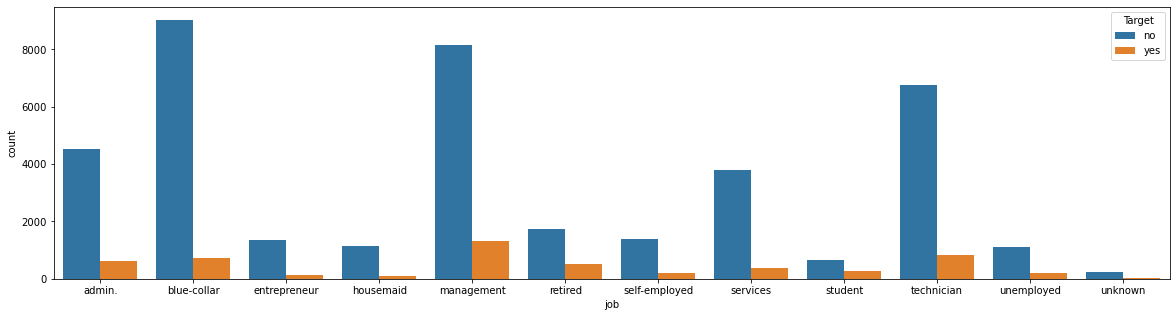

In [28]:
plt.figure(figsize= (20,5))
sns.countplot(x='job', hue='Target', data=bank_data, order=sorted(list(bank_data['job'].unique()), key=str.lower));

**Insights** <br>

- Students seem to have the highest subscription rate (**28.9%**) followed by the *retired* job-class (**22.8%**)<br>
- *Blue-collar* (**9732**), *Management* (**9458**) and *Technicians* (**7597**) are the top most contacted job-classes in the dataset. *This is expected in general because these most likely have stable income and have a higher capacity to purchase term deposit*.<br>
- Subscription rate is lower from the *blue-collar* job-class (**7.27%**), closely followed by *entrepreneur* (**8.27%**). Maybe these are too sensitive to the risk and hence the conversion rate

In [29]:
bank_data.groupby(['job', 'Target'])[conts].mean()

age      balance        day    duration  campaign  \
job           Target                                                            
admin.        no      39.266300  1093.942070  15.633700  211.285903  2.647797   
              yes     39.459588  1437.283677  15.064976  503.114105  2.053883   
blue-collar   no      40.143506  1063.402371  15.483599  230.541445  2.866467   
              yes     38.776836  1275.420904  14.919492  675.355932  2.186441   
entrepreneur  no      42.145894  1494.642229  15.775660  221.439883  2.793255   
              yes     42.691057  1818.975610  14.886179  642.991870  2.869919   
housemaid     no      46.140584  1353.740053  15.961096  216.251105  2.848806   
              yes     49.266055  1793.486239  16.431193  552.688073  2.532110   
management    no      40.534878  1703.472723  16.296433  214.819909  2.966041   
              yes     39.914681  2140.707917  14.971560  499.620292  2.226749   
retired       no      59.912471  1775.685927  15.435355  236.303204  2.486842   
              yes     67.434109  2690.627907  15.453488  460.325581  1.872093   
self-employed no      40.712644  1553.418103  16.112069  225.721264  2.953305   
              yes     38.786096  2351.807487  15.401070  584.042781  2.106952   
services      no      38.863144   985.851783  15.688243  223.979921  2.776222   
              yes     37.479675  1112.344173  15.094851  621.804878  2.124661   
student       no      26.862481  1347.578475  14.647235  197.784753  2.420030   
              yes     25.747212  1488.739777  15.520446  368.200743  2.000000   
technician    no      39.344532  1179.842830  16.544472  217.285038  3.000000   
              yes     39.073810  1838.152381  15.315476  539.433333  2.157143   
unemployed    no      40.978202  1556.144414  15.592189  239.533152  2.520436   
              yes     40.871287  1334.257426  14.985149  555.673267  1.950495   
unknown       no      47.637795  1710.712598  14.586614  205.673228  3.492126   
              yes     47.264706  2232.882353  15.058824  476.205882  1.941176   

                          pdays  previous  
job           Target                       
admin.        no      43.544714  0.586784  
              yes     78.900158  1.282092  
blue-collar   no      43.334220  0.477948  
              yes     52.946328  0.851695  
entrepreneur  no      31.364370  0.455279  
              yes     44.926829  0.731707  
housemaid     no      18.093722  0.332449  
              yes     56.908257  0.779817  
management    no      32.797107  0.565894  
              yes     75.458878  1.308224  
retired       no      29.060069  0.457094  
              yes     65.844961  1.253876  
self-employed no      31.240661  0.494253  
              yes     60.850267  0.978610  
services      no      38.846235  0.448613  
              yes     74.295393  1.040650  
student       no      49.058296  0.799701  
              yes     76.895911  1.334572  
technician    no      34.000444  0.493414  
              yes     62.892857  1.227381  
unemployed    no      25.046322  0.321526  
              yes     83.747525  1.257426  
unknown       no      12.000000  0.192913  
              yes     88.088235  1.264706

**Observations**
- the mean-balance for those who bought the term deposit is much higher than for those who didn't buy.
- the mean age of students is lowest while mean age for the retired is the highest, which is expected in a normal dataset. However the mean age for students who bought the term deposit is lower, while for the retired its higher for those who purchased the term deposit. from my intuition, I would have expected the reverse but as is with the dataset it looks like those who are not working ( *or geerating income* ) are most likey to purchase the term deposit than would those with income.

- Also, previous ( *number of times the client has been contacted before for the last campaign to subscribe term deposit*) is higher across all job classes for clients who bought the term deposit than for those who didn't. Frequency of call will most probably indicate show of interest from the first contact which necessitated follow-up calls to clients

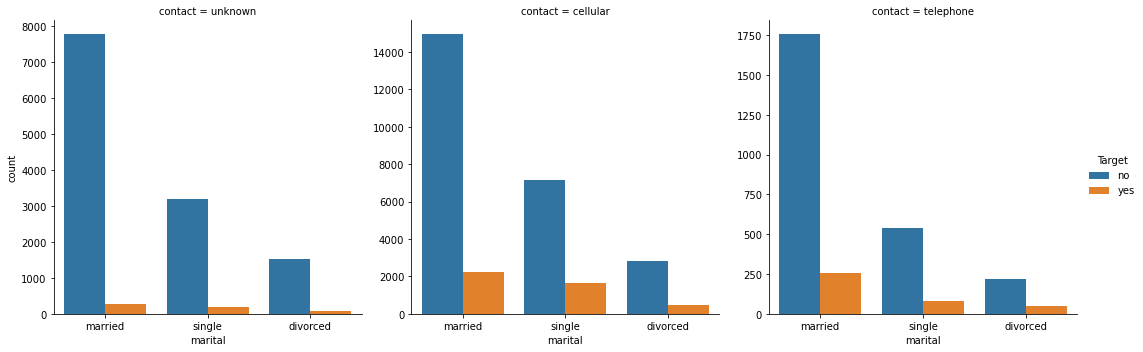

In [30]:
sns.catplot(x='marital', hue = 'Target', col = 'contact', data = bank_data, kind='count', sharey=False, sharex=False, col_wrap=3);

Graphs show that most clients were contacted through their cellular devices. In all the contact categories, there are more clients who are married who bought the term deposit than any other marital status. However this is expected as the married are the modal class in the marital status variable.

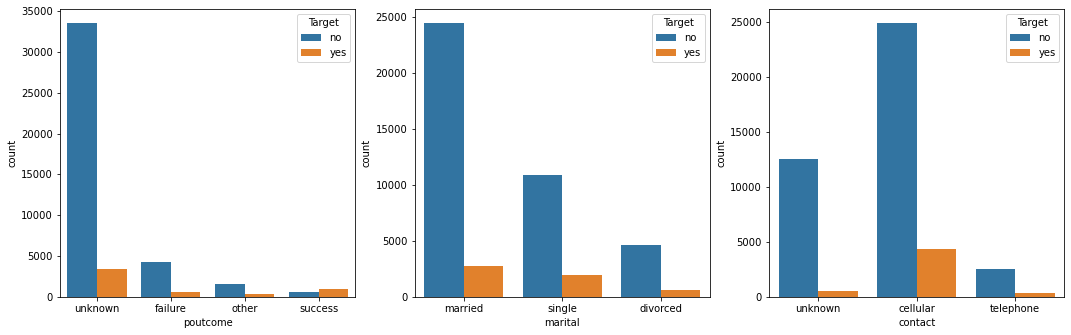

In [31]:
plt.figure(figsize= (18,18))

lst = ['poutcome', 'marital', 'contact']
for col in lst:
    plt.subplot(3,3,lst.index(col)+1)
    sns.countplot(x=col, hue='Target', data=bank_data);

**Balance** vs **Target**

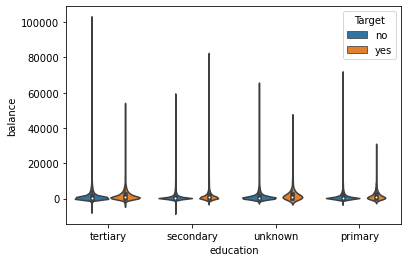

In [32]:
sns.violinplot(data=bank_data, x="education", y="balance", hue="Target");

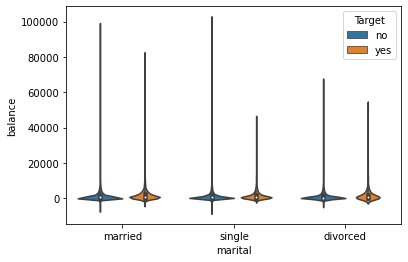

In [33]:
sns.violinplot(data=bank_data, x="marital", y="balance", hue="Target");

In [34]:
bank_data.groupby(['Target'])['balance'].max()

Target
no     102127
yes     81204
Name: balance, dtype: int64

In [35]:
bank_data.groupby(['Target'])['balance'].min()

Target
no    -8019
yes   -3058
Name: balance, dtype: int64

In [36]:
bank_data.groupby(['Target'])['balance'].mean()

Target
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

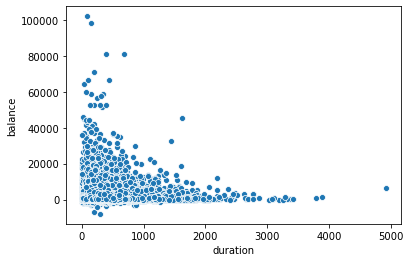

In [37]:
sns.scatterplot(x='duration', y='balance',  data=bank_data);

**Observations**

balance ........

**Encoding bivariate data**

In [38]:
lst = ['default', 'housing', 'loan','Target']
for col in lst:
    bank_data[col].replace({'yes':1, 'no':0}, inplace=True)

In [39]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [40]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

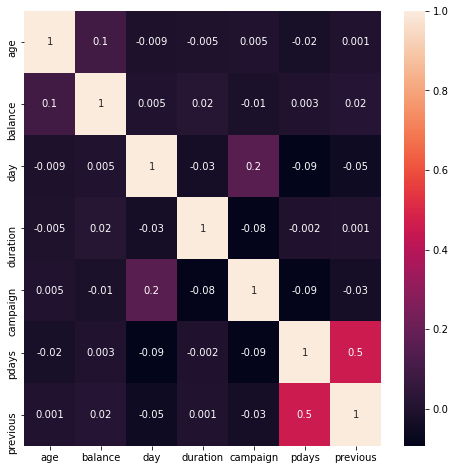

In [41]:
plt.figure(figsize= (8,8))
sns.heatmap(bank_data[conts].corr(), annot=True, fmt='.1g');

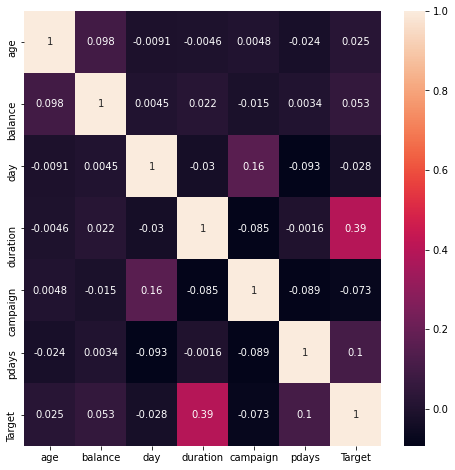

In [42]:
plt.figure(figsize= (8,8))
sns.heatmap(bank_data[['age', 'balance','day', 'duration', 'campaign', 'pdays', 'Target']].corr(), annot=True);

# Data Preparation

> We have continuous data with different scales therefore we go on to do scaled data for continuous variables so as to standardize the dataset for logistics regression <br>
> We also have categorical features, which we will encode in two different ways (One-hot-encode for multi-level categorical variables, and label encoding for binary variables) <br>

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [44]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [45]:
o_conts = ['age', 'balance', 'day', 'duration']   # columns to be treated for outliers
df = bank_data.copy()

lwr = df[o_conts].quantile(0.25)
upr = df[o_conts].quantile(0.75)
IQR = upr - lwr

outliers_low = (df[o_conts] < lwr - 1.5*IQR)
outliers_high = (df[o_conts] > upr + 1.5*IQR)

# df[conts][outliers_low] = np.nan
# df[conts].fillna(lwr, inplace=True)

df[o_conts] = df[o_conts].mask(outliers_low, lwr, axis=1)
df[o_conts] = df[o_conts].mask(outliers_high, upr, axis=1)

Checking if Outliers have been treated


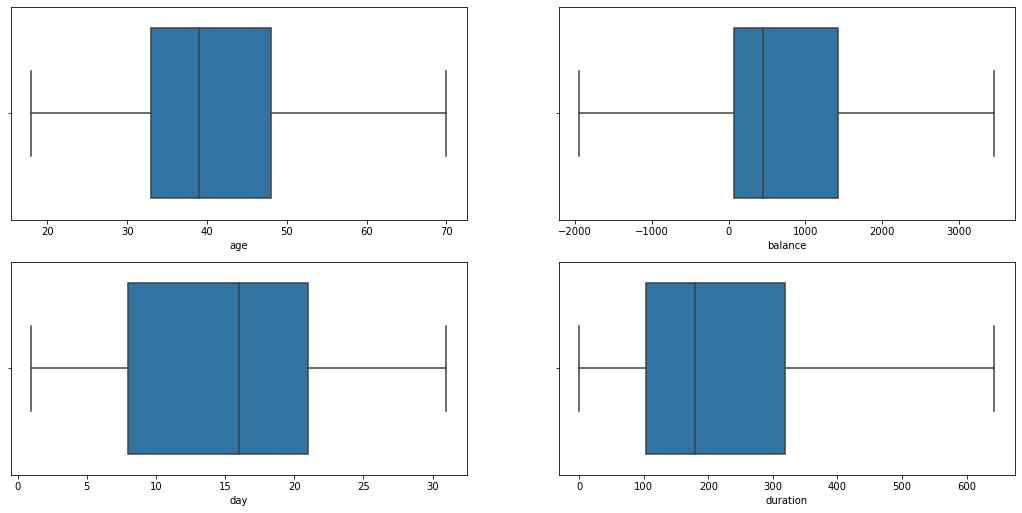

In [46]:
plt.figure(figsize= (18,18))

for col in o_conts:
    plt.subplot(4,2, o_conts.index(col)+1)
    sns.boxplot(x=col, hue='Target', data=df);

In [47]:
#Convert variables to a categorical variable wherever relevant

c_lst = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in c_lst:
    df[col] = df[col].astype('category')


In [48]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [49]:
le = LabelEncoder()

X_le = X.copy()

for col in c_lst:
    X_le[col] = le.fit_transform(X_le[col])

In [50]:
X_ohe = pd.get_dummies(X, drop_first=True)

# Standardizing the data

In [51]:
scaler = StandardScaler()
X_ohe[conts] = scaler.fit_transform(X_ohe[conts])

In [52]:
X_ohe.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.745443,0,1.702098,1,0,-1.298476,0.354527,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
1,0.338976,0,-0.830949,1,0,-1.298476,-0.437406,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
2,-0.766105,0,-0.863301,1,1,-1.298476,-0.977361,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
3,0.640362,0,0.938829,1,0,-1.298476,-0.862170,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
4,-0.766105,0,-0.864499,0,0,-1.298476,-0.099035,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1


In [53]:
# Split the data1
Xohe_train, Xohe_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.30, random_state=1)
# Split the data2
Xle_train, Xle_test, y_train, y_test = train_test_split(X_le, y, test_size=0.30, random_state=1)

In [54]:
y_train.value_counts(normalize=True)

0    0.881885
1    0.118115
Name: Target, dtype: float64

In [55]:
y_test.value_counts(normalize=True)

0    0.885653
1    0.114347
Name: Target, dtype: float64

Random sampling did a very good job, managed to keep the distribution of the classes consistent between the two sets

Even though the data is not balanced, the split is not biased wich is workable with

# Logistics Regression

Building the logistic regression model usins stasmodel first in order to understand the significance of each variable by assessing the p-values

In [56]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(Xohe_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.264630
         Iterations 8


In [57]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.2713
Time:                        22:14:17   Log-Likelihood:                -8374.8
converged:                       True   LL-Null:                       -11493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7477      0.158    -11.053      0.000      -2.058      -1.438
age                    -0.0596      0.025     -2.353      0.019      -0.109      -0.010
default         

there are couple of p-values that indicate non-significance as they are greater than 0.05 alpha level of significance from the logistic regression model. Feature selection may be beyond the scope of this project hence it will not be pursued in this project.

In [58]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=1)
logreg.fit(Xohe_train, y_train) 

LogisticRegression(random_state=1, solver='liblinear')

In [59]:
# evaluate the model
yhat = logreg.predict(Xohe_test)

#evaluate learning
print('training score:', format(logreg.score(Xohe_train, y_train), '.2%'))
print('out of sample:', format(logreg.score(Xohe_test, y_test), '.2%'))

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy:', format(accuracy, '.2%'))

# evaluate predictions
precision = precision_score(y_test, yhat)
print('precision:', format(precision, '.2%'))

training score: 89.50%
out of sample: 89.55%
Accuracy: 89.55%
precision: 60.28%


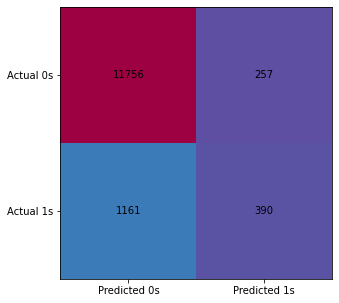

In [60]:
from sklearn.metrics import confusion_matrix


cm= confusion_matrix(y_test, yhat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Spectral_r')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.60      0.25      0.35      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.62      0.65     13564
weighted avg       0.87      0.90      0.88     13564



Model did well for 'Target' == 0 (NO), but did not do so well for 'Target' == 1(YES)<br>
Some bit of hyper-parameter tuning to see if the model can be improved, i will run a loop on solver, and penalty to achieve this

In [62]:
param_list = ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']

a, b, c , d= [], [], [], []
for i in param_list:
    model = LogisticRegression(solver= i, penalty='l2', random_state=1, max_iter=6000)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(i)
    b.append(recall_score(y_test,y_pred))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([a, b, c, d], index=['Solver', 'recall','Precision', 'roc_auc_score'])

,0,1,2,3,4
Solver,liblinear,newton-cg,sag,saga,lbfgs
recall,0.251451,0.251451,0.250806,0.250806,0.251451
Precision,0.602782,0.601852,0.601236,0.601236,0.601852
roc_auc_score,0.75645,0.755982,0.755639,0.755639,0.755982


In [63]:
C = [0.5 , 0.75, 1, 1.25]
# p = ['l1', 'l2']
a, b, c , d= [], [], [], []
for i in param_list[1:]:
    for j in C:
        model = LogisticRegression(solver= i, random_state=1, C = j, max_iter=1000)
        model.fit(Xohe_train, y_train)
        y_pred = model.predict(Xohe_test)
        a.append(i)
        b.append(model.score(Xohe_train, y_train))
        c.append(precision_score(y_test,y_pred))
        d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([b, c, d], index=['train_score','precision_score', 'roc_auc_score'], columns= a)

,newton-cg,newton-cg,newton-cg,newton-cg,sag,sag,sag,sag,saga,saga,saga,saga,lbfgs,lbfgs,lbfgs,lbfgs
train_score,0.895093,0.894998,0.894966,0.895061,0.895093,0.894998,0.894966,0.895093,0.895061,0.894966,0.894966,0.895061,0.895061,0.894998,0.894998,0.895030
precision_score,0.600311,0.601236,0.601852,0.602465,0.600932,0.602167,0.601236,0.602465,0.600932,0.602167,0.601236,0.602465,0.600932,0.600619,0.601852,0.602465
roc_auc_score,0.755074,0.755639,0.755982,0.756324,0.755419,0.756108,0.755639,0.756324,0.755419,0.756108,0.755639,0.756324,0.755419,0.755295,0.755982,0.756324


From the tests above, hyper-parameter does not improve the model (improvement is by a small margin - only 3 observation are correctly predicted), hence we conclude the final model for the logistics regression is any one of the solvers *'lbfgs', 'newton-cg', 'sag'* , C=0.75 and max_iter = 1000 and default penalty. For the purposes of this study we will choose **'lbfs'**

In [64]:
lr_fin = LogisticRegression(solver='lbfgs', C=0.75, max_iter=1000, random_state=1)
lr_fin.fit(Xohe_train, y_train)
y_lr = lr_fin.predict(Xohe_test)

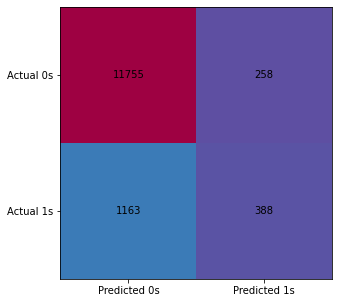

In [65]:
cm= confusion_matrix(y_test, y_lr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Spectral_r')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

In [66]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.60      0.25      0.35      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.61      0.65     13564
weighted avg       0.87      0.90      0.88     13564



# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt.fit(Xohe_train, y_train)

DecisionTreeClassifier(random_state=1)

In [68]:
ycap = dt.predict(Xohe_test)

In [69]:
print(dt.score(Xohe_train, y_train))
print(dt.score(Xohe_test, y_test))

1.0
0.8723827779416101


In [70]:
print(precision_score(ycap, y_test))

0.47904577691811734


In [71]:
print(classification_report(y_test, ycap))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12013
           1       0.45      0.48      0.46      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.88      0.87      0.87     13564



In [72]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ycap)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7011061732338859

As in Logistic regression, Decision tree did not do well with classifying the 'YES' values, we will do some bit of parameter tuning to try and improve the model

In [73]:
param_list = ['gini', 'entropy']

a, b, c , d= [], [], [], []
for i in param_list:
    model = DecisionTreeClassifier(criterion= i, random_state=1)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(i)
    b.append(recall_score(y_test,y_pred))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([b, c, d], index = ['recall_score', 'precision_score', 'roc_auc_score'], columns=param_list)

,gini,entropy
recall_score,0.479046,0.504836
precision_score,0.445978,0.460588
roc_auc_score,0.689034,0.697927


'entropy' does better than 'gini'

In [74]:
depth = [3, 4, 5, 6, 7, 8, 9]

a, b, c , d= [], [], [], []
for i in depth:
    model = DecisionTreeClassifier(criterion= 'entropy', max_depth=i, random_state=1)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(model.score(Xohe_train, y_train))
    b.append(model.score(Xohe_test, y_test))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([a, b, c, d], index=['train_score','test_score','precision_score', 'roc_auc_score'], columns= depth)

,3,4,5,6,7,8,9
train_score,0.898695,0.898821,0.900149,0.901128,0.903466,0.905899,0.909944
test_score,0.900103,0.899808,0.901651,0.902020,0.899882,0.898924,0.899587
precision_score,0.592628,0.591255,0.657019,0.652473,0.627477,0.611386,0.601942
roc_auc_score,0.759372,0.758503,0.785901,0.784323,0.771730,0.764262,0.761681


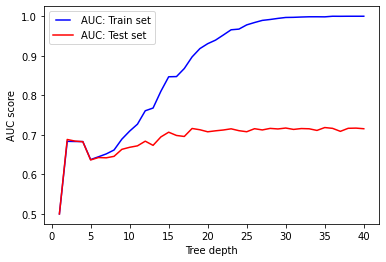

In [75]:
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results, test_results = [], []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    dt.fit(Xohe_train, y_train)
    train_cap = dt.predict(Xohe_train)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, train_cap)
    roc_auc = auc(fpr_train, tpr_train)
       # Add auc score to previous train results
    train_results.append(roc_auc)
    test_cap = dt.predict(Xohe_test)
    fpr_test, tpr_test, thresholds = roc_curve(y_test, test_cap)
    roc_auc = auc(fpr_test, tpr_test)
       # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='AUC: Train set')
line2, = plt.plot(max_depths, test_results, 'r', label='AUC: Test set')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

It is clear that the model is inconsistent for depth below 3 but also overfits for large depth values. <br> 
The tree perfectly predicts all of the train data, however, in the process it also learns the noise and fails to generalize the findings for unseen data. Hence the best choice of max_depth is 6 in this case

In [76]:
dt_fin = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
dt_fin.fit(Xohe_train, y_train)
y_dt = dt_fin.predict(Xohe_test)

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_dt)
roc_auc = auc(fpr, tpr)
roc_auc

0.6425967559429359

In [78]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.65      0.31      0.42      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.89      0.90      0.89     13564



In [79]:
print(pd.DataFrame(sorted(dt_fin.feature_importances_, reverse=True), columns = ["Imp"], index = Xohe_train.columns))

                          Imp
age                  0.539852
default              0.226608
balance              0.092717
housing              0.050382
loan                 0.019512
day                  0.019329
duration             0.011449
campaign             0.008465
pdays                0.008296
previous             0.005296
job_blue-collar      0.003310
job_entrepreneur     0.002906
job_housemaid        0.002855
job_management       0.002652
job_retired          0.001739
job_self-employed    0.001271
job_services         0.001148
job_student          0.000871
job_technician       0.000687
job_unemployed       0.000655
job_unknown          0.000000
marital_married      0.000000
marital_single       0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
contact_telephone    0.000000
contact_unknown      0.000000
month_aug            0.000000
month_dec            0.000000
month_feb            0.000000
month_jan            0.000000
month_jul 

From the feature importance a couple of things are clear<br>
1. Age is a very important factor hence the bank and its marketing department can use this to target old age clients (retired class) who are most probably looking to invest their lifelong savings and are looking for more stable investment options.<br>
2. Duration is definately correlated to Term deposits subscription, meaning that the campaign should be structured in a way that will captivate the client with the intention of keeping them on the call longer. the longer they stay on the call, the higher the chances of convincing them to subcribe <br>
3. Having credit that is in default is also one important factor in this campaign. Bank marketing department should minimise the risk, hence they should target those clients first with no default history

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=30, random_state=1)
rfc.fit(Xohe_train,y_train)
# predictions
rfc_pred = rfc.predict(Xohe_test)

accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.19


In [82]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6537435562366002

In [83]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.64      0.33      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



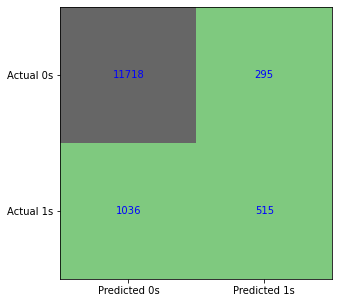

In [84]:
conf_mat= confusion_matrix(y_test, rfc_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_mat, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='blue')

#### Hyper parameter tuning: Random Classifier

In [85]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [86]:
param_list = [30, 40, 50, 75, 100, 150, 200]

a, b, c , d= [], [], [], []
for i in param_list:
    model = RandomForestClassifier(n_estimators=i, random_state=1)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(i)
    b.append(recall_score(y_test,y_pred))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([b, c, d], index = ['recall_score', 'precision_score', 'roc_auc_score'], columns=param_list)

,30,40,50,75,100,150,200
recall_score,0.332044,0.349452,0.341070,0.360413,0.357834,0.348162,0.352031
precision_score,0.635802,0.645238,0.641990,0.650757,0.647608,0.641330,0.650775
roc_auc_score,0.777287,0.782970,0.780885,0.786339,0.784613,0.780931,0.785898


I find that the model performs best when teh number of estimators is 75. I go on to check *criterion* and *max_depth*
Below is the code investigating criterion and 'gini' sems to perform better than entropy. Gini is also the default hence we will leave it as is

In [87]:
param_list = ['gini', 'entropy']

a, b, c , d= [], [], [], []
for i in param_list:
    model = RandomForestClassifier(n_estimators=75, criterion=i, random_state=1)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(i)
    b.append(recall_score(y_test,y_pred))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([b, c, d], index = ['recall_score', 'precision_score', 'roc_auc_score'], columns=param_list)

,gini,entropy
recall_score,0.360413,0.346873
precision_score,0.650757,0.642005
roc_auc_score,0.786339,0.781202


In [88]:
param_list = [3, 4, 5, 6, 7, 8, 10]

a, b, c , d= [], [], [], []
for i in param_list:
    model = RandomForestClassifier(n_estimators=75, max_depth=i, random_state=1)
    model.fit(Xohe_train, y_train)
    y_pred = model.predict(Xohe_test)
    a.append(i)
    b.append(recall_score(y_test,y_pred))
    c.append(precision_score(y_test,y_pred))
    d.append(roc_auc_score(y_pred, y_test))
        
pd.DataFrame([b, c, d], index = ['recall_score', 'precision_score', 'roc_auc_score'], columns=param_list)

,3,4,5,6,7,8,10
recall_score,0.005803,0.053514,0.105093,0.128949,0.149581,0.160542,0.190845
precision_score,0.900000,0.813725,0.779904,0.766284,0.755700,0.741071,0.740000
roc_auc_score,0.893116,0.852339,0.837987,0.832364,0.828103,0.821322,0.822332


max_depth of 3 optimises significantly deteriorates the recall score hence we will leave the default figures. 

after trying max_features, min_sample_split, and min_sample_leaf i realised there is no change in performance hence the final adopted model is as given below


In [89]:
# random forest model creation
rfcl = RandomForestClassifier(n_estimators=75, random_state=1)
rfcl.fit(Xohe_train,y_train)
# predictions
rfc_pred = rfcl.predict(Xohe_test)

accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.47


In [90]:
print(rfcl.score(Xohe_train, y_train))

0.9999052042847664


In [91]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6677198455165941

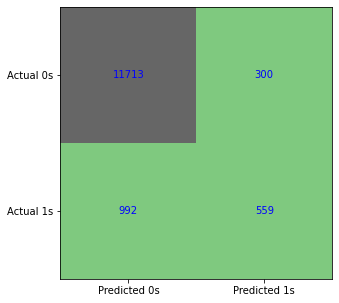

In [92]:
cm=confusion_matrix(y_test, rfc_pred,labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue');

In [106]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.65      0.36      0.46      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# Bagging

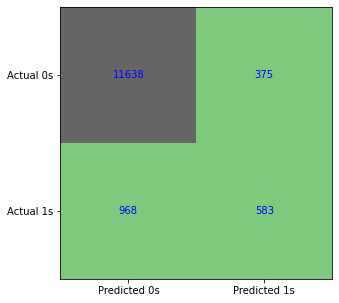

In [93]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_fin, n_estimators=50, random_state=1)

bgcl = bgcl.fit(Xohe_train, y_train)
bgcl_pred = bgcl.predict(Xohe_test)

cm=confusion_matrix(y_test, bgcl_pred,labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue');

In [94]:
print('training score: ', (bgcl.score(Xohe_train , y_train)*100).round(2),'%')
print('testing score: ', (bgcl.score(Xohe_test , y_test)*100).round(2), '%')

training score:  90.31 %
testing score:  90.1 %


In [95]:
fpr, tpr, thresholds = roc_curve(y_test, bgcl_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6723351711768515

In [96]:
print(classification_report(y_test, bgcl_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.61      0.38      0.46      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# AdaBoosting

the higher the number of estimators the higher the chances of overfitting

With parameter tuning, the most optimal number of estimators that minimises the variance is <br>
I started with *n_estimators =* 50 and increased up to 200 and noted that the best out-of-smaple performance is obtained when we set *n_estimators* to 50

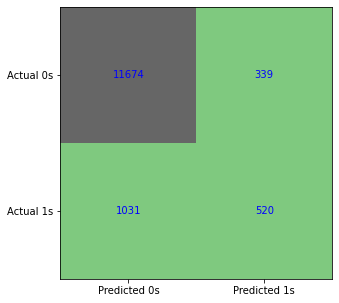

In [97]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1) 

abcl = abcl.fit(Xohe_train, y_train)

ab_pred = abcl.predict(Xohe_test)

cm = confusion_matrix(y_test, ab_pred,labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue');

In [98]:
print('training score: ', (abcl.score(Xohe_train , y_train)*100).round(2),'%')
print('testing score: ', (abcl.score(Xohe_test , y_test)*100).round(2), '%')

training score:  90.06 %
testing score:  89.9 %


In [99]:
fpr, tpr, thresholds = roc_curve(y_test, ab_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.653524070179077

In [107]:
print(classification_report(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.61      0.34      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



# Gradient Boosting

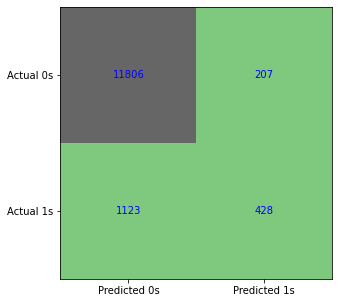

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(Xohe_train, y_train)

gb_pred = gbcl.predict(Xohe_test)
cm = confusion_matrix(y_test, gb_pred,labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue');

In [101]:
print('training score: ', (gbcl.score(Xohe_train , y_train)*100).round(2),'%')
print('testing score: ', (gbcl.score(Xohe_test , y_test)*100).round(2), '%')

training score:  90.2 %
testing score:  90.19 %


In [102]:
fpr, tpr, thresholds = roc_curve(y_test, gb_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6293598333161856

In [108]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12013
           1       0.67      0.28      0.39      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.89      0.90      0.88     13564



# Voting Classifier

In [114]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('log_reg', lr_fin), ('rf', rfcl), ('bagging', bgcl), ('gb', gbcl), ('ada', abcl)], voting='soft')
model.fit(Xohe_train, y_train)

ytrain_pred = model.predict(Xohe_train)
ytest_pred = model.predict(Xohe_test)

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.608490409835938

In [116]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12013
           1       0.71      0.23      0.35      1551

    accuracy                           0.90     13564
   macro avg       0.81      0.61      0.65     13564
weighted avg       0.89      0.90      0.88     13564



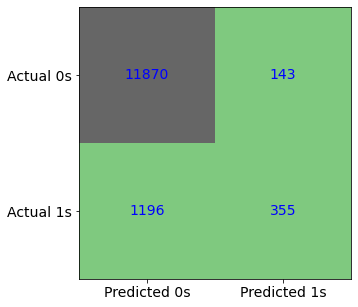

In [117]:
cm = confusion_matrix(y_test, ytest_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Accent')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue');

## Model Comparison

In [118]:
models = ["Logistics Regression", 'Decision Trees', 'Random Forest', 'Bagging', 'AdaBoosting', 'Gradient Boosting', 'Voting']
cl = [lr_fin, dt_fin, rfcl, bgcl, abcl, gbcl, model]
train_score = [(x.score(Xohe_train , y_train)*100).round(2) for x in cl]
test_score = [(x.score(Xohe_test , y_test)*100).round(2) for x in cl]
_roc_auc, _precision, _recall, _f1Score = [], [], [], []
for x in cl:
    y_pred = x.predict(Xohe_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    _roc_auc.append((auc(fpr, tpr)*100).round(2))
    _precision.append((precision_score(y_test, y_pred)*100).round(2))
    _recall.append((recall_score(y_test, y_pred)*100).round(2))
    _f1Score.append((f1_score(y_test, y_pred)*100).round(2))
    
# dictionary to store performance scores for each model
score = {'Models': models,
         'Train Score': train_score,
         'Test Score': test_score,
         'Precision': _precision,
         'Recall': _recall,
         'f1 Score': _f1Score,
         'ROC AUC': _roc_auc
        }

In [119]:
score_df = pd.DataFrame(score)
score_df

,Models,Train Score,Test Score,Precision,Recall,f1 Score,ROC AUC
0,Logistics Regression,89.50,89.52,60.06,25.02,35.32,61.43
1,Decision Trees,90.11,90.20,65.25,30.63,41.68,64.26
2,Random Forest,99.99,90.47,65.08,36.04,46.39,66.77
3,Bagging,90.31,90.10,60.86,37.59,46.47,67.23
4,AdaBoosting,90.06,89.90,60.54,33.53,43.15,65.35
5,Gradient Boosting,90.20,90.19,67.40,27.60,39.16,62.94
6,Voting,91.90,90.13,71.29,22.89,34.65,60.85


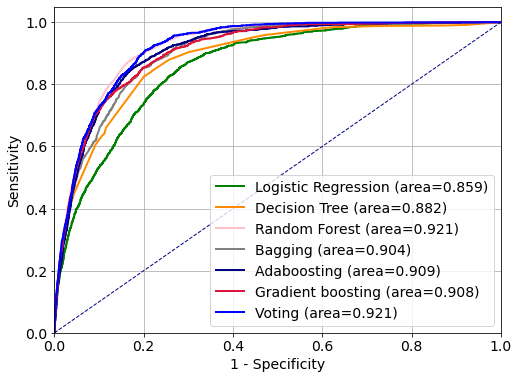

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import rcParams

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, lr_fin.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='green', lw=2, label='Logistic Regression (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, dt_fin.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, rfcl.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='pink', lw=2, label='Random Forest (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, bgcl.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='gray', lw=2, label='Bagging (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, abcl.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='navy', lw=2, label='Adaboosting (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, gbcl.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='crimson', lw=2, label='Gradient boosting (area={0:.3f})'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, model.predict_proba(Xohe_test)[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='Voting (area={0:.3f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

From the analysis above, it is noted that the *Random forest* has the best AUC (**92.1%**). However, i would argue that *Bagging* has the smallest variance between the training score and the test score, further more, it has the best recall score and the best f1 score  amongst all the models which are robust measures of performance for a classification problem like this one. I therefore would advice the marketing departemnt of the bank to adopt the *bagging classifier model* on the basis of the performance metrics i have highlighted above

Also it was noted that *age* is a feature of high importance in solving this problem. The old aged clients have should be the main target of the campaign

Marketing department should strive balance the risk of defaulters and losing opportunity of business by not selling to clients who have defaulted in their loans in the past

Duration turned out to be correlated to the target variable, meaning the longer the client stays on the phone the more likely they are to subscribe to the Term Deposit campaign.

**Random Forest Classifier** and **Bagging Classifier** gave a better performance especially with One Hot Encoded data. Other models gave more or less similar results for both *One Hot Encoded data* and *Label Encoded data* hence i decided to leave *label encoded data* and deal only with one-hot-enocded data. **Voting Classifier** performs well with precision but falls short on the other more robust performance metrics